NAMA : HARNELIA
NIM : E1E122056

In [1]:

import pandas as pd  #Mengimpor library Pandas, Aliasnya pd supaya mempersingkat.

df = pd.read_csv('/content/abalone.csv')  #Membaca file CSV yang terletak di '/content/train.csv' dan menyimpannya ke dalam DataFrame df.
df.head()  #Menampilkan lima baris pertama dari DataFrame df.


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [3]:
df.drop(['Sex', 'Whole weight', 'Rings'], axis=1, inplace=True)

In [4]:
df.head()

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.0895,0.0395,0.055


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Length', 'Diameter','Height','Shucked weight','Viscera weight','Shell weight']])

df[['Length', 'Diameter','Height','Shucked weight','Viscera weight','Shell weight']] = scaled_features

In [7]:
df.head()

,Length,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,-0.574558,-0.432149,-1.064424,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.215968,-1.287337,-1.320757


In [8]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(df)
  clusters.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

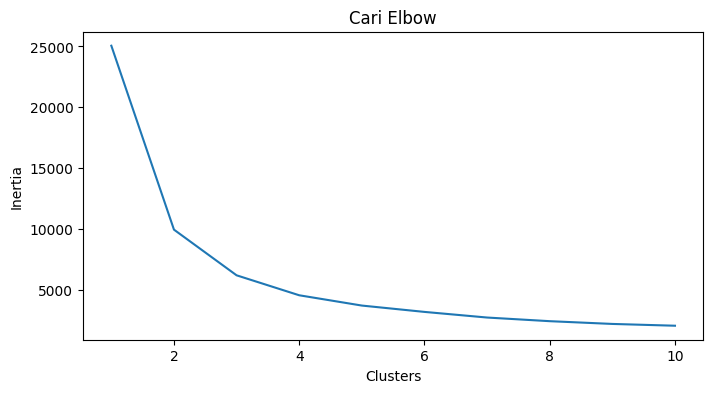

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


In [14]:
# membuat objek KMeans
km5 = KMeans(n_clusters=3).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# menambahkan kolom label pada dataset
df['Labels'] = km5.labels_

<ipython-input-16-b34e56d0a1e1>:3: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(x=df['Length'], y=df['Shucked weight'], hue=df['Labels'],


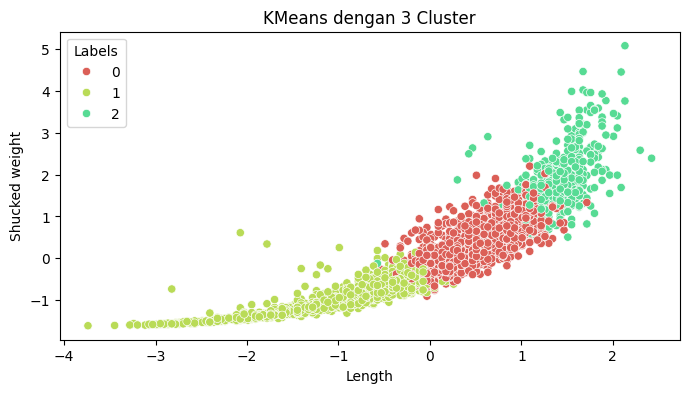

In [16]:
#membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Length'], y=df['Shucked weight'], hue=df['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 3 Cluster')
plt.show()